In [1]:
# MISC
import os
import sys

sys.path.append("..")
os.environ['MUJOCO_GL']='egl'
os.environ['CUDA_VISIBLE_DEVICES']='1'

# import shutup
# shutup.please()

import jax
import jax.numpy as jnp

import numpy as np
from functools import partial

# VIS
import matplotlib
import matplotlib.pyplot as plt
import mediapy
from rich.pretty import pprint
from tqdm.auto import tqdm

from agents.dynamics_aware_iql import GCIQLAgent
from hydra import initialize, compose
from omegaconf import OmegaConf

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-notebook'])
colors = plt.rcParams['axes.prop_cycle'].by_key()['color'] 

GLOBAL_KEY = jax.random.key(42)

,,

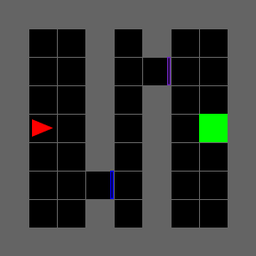
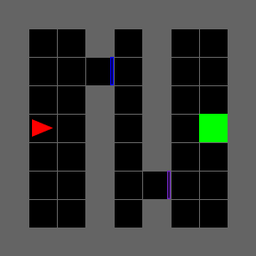
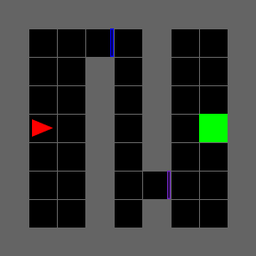

In [2]:
from envs.minigrid.doors_grid import DynamicsGeneralization_Doors, MinigridWrapper

# Train dynamics
layouts = []
for i in [0, 1, 2]:
    env = DynamicsGeneralization_Doors(render_mode="rgb_array", highlight=False, max_steps=200)
    env._gen_grid = partial(env._gen_grid, layout_type=i)
    env = MinigridWrapper(env)
    env.reset()
    
    layouts.append(env.render())
    
mediapy.show_images(layouts, width=256, height=256)

In [3]:
from sbx import PPO

model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=200_000, progress_bar=True)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


Output()

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 185      |
|    ep_rew_mean     | 0.0761   |
| time/              |          |
|    fps             | 514      |
|    iterations      | 1        |
|    time_elapsed    | 3        |
|    total_timesteps | 2048     |
---------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 191      |
|    ep_rew_mean        | 0.0544   |
| time/                 |          |
|    fps                | 379      |
|    iterations         | 2        |
|    time_elapsed       | 10       |
|    total_timesteps    | 4096     |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.00696  |
|    n_updates          | 10       |
|    pg_loss            | -0.0225  |
|    value_loss         | 0.0168   |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 173      |
|    ep_rew_mean        | 0.156    |
| time/                 |          |
|    fps                | 433      |
|    iterations         | 3        |
|    time_elapsed       | 14       |
|    total_timesteps    | 6144     |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.552    |
|    n_updates          | 20       |
|    pg_loss            | -0.0318  |
|    value_loss         | 0.00874  |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 167      |
|    ep_rew_mean        | 0.193    |
| time/                 |          |
|    fps                | 471      |
|    iterations         | 4        |
|    time_elapsed       | 17       |
|    total_timesteps    | 8192     |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.479    |
|    n_updates          | 30       |
|    pg_loss            | 0.0159   |
|    value_loss         | 0.0187   |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 156      |
|    ep_rew_mean        | 0.253    |
| time/                 |          |
|    fps                | 497      |
|    iterations         | 5        |
|    time_elapsed       | 20       |
|    total_timesteps    | 10240    |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.427    |
|    n_updates          | 40       |
|    pg_loss            | 0.0161   |
|    value_loss         | 0.0153   |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 153      |
|    ep_rew_mean        | 0.27     |
| time/                 |          |
|    fps                | 513      |
|    iterations         | 6        |
|    time_elapsed       | 23       |
|    total_timesteps    | 12288    |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.583    |
|    n_updates          | 50       |
|    pg_loss            | -0.00648 |
|    value_loss         | 0.015    |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 146      |
|    ep_rew_mean        | 0.308    |
| time/                 |          |
|    fps                | 526      |
|    iterations         | 7        |
|    time_elapsed       | 27       |
|    total_timesteps    | 14336    |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.717    |
|    n_updates          | 60       |
|    pg_loss            | -0.0265  |
|    value_loss         | 0.00469  |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 123      |
|    ep_rew_mean        | 0.433    |
| time/                 |          |
|    fps                | 537      |
|    iterations         | 8        |
|    time_elapsed       | 30       |
|    total_timesteps    | 16384    |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.739    |
|    n_updates          | 70       |
|    pg_loss            | 0.0125   |
|    value_loss         | 0.0106   |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 112      |
|    ep_rew_mean        | 0.489    |
| time/                 |          |
|    fps                | 546      |
|    iterations         | 9        |
|    time_elapsed       | 33       |
|    total_timesteps    | 18432    |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.645    |
|    n_updates          | 80       |
|    pg_loss            | 0.0227   |
|    value_loss         | 0.0133   |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 101      |
|    ep_rew_mean        | 0.536    |
| time/                 |          |
|    fps                | 553      |
|    iterations         | 10       |
|    time_elapsed       | 37       |
|    total_timesteps    | 20480    |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.581    |
|    n_updates          | 90       |
|    pg_loss            | -0.0329  |
|    value_loss         | 0.00792  |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 82.7     |
|    ep_rew_mean        | 0.626    |
| time/                 |          |
|    fps                | 559      |
|    iterations         | 11       |
|    time_elapsed       | 40       |
|    total_timesteps    | 22528    |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.57     |
|    n_updates          | 100      |
|    pg_loss            | -0.0202  |
|    value_loss         | 0.00893  |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 67.9     |
|    ep_rew_mean        | 0.693    |
| time/                 |          |
|    fps                | 563      |
|    iterations         | 12       |
|    time_elapsed       | 43       |
|    total_timesteps    | 24576    |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.641    |
|    n_updates          | 110      |
|    pg_loss            | 0.0106   |
|    value_loss         | 0.01     |
------------------------------------


-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 55.2      |
|    ep_rew_mean        | 0.752     |
| time/                 |           |
|    fps                | 567       |
|    iterations         | 13        |
|    time_elapsed       | 46        |
|    total_timesteps    | 26624     |
| train/                |           |
|    clip_range         | 0.2       |
|    explained_variance | 0.593     |
|    n_updates          | 120       |
|    pg_loss            | -0.000633 |
|    value_loss         | 0.0117    |
-------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 49.9     |
|    ep_rew_mean        | 0.776    |
| time/                 |          |
|    fps                | 571      |
|    iterations         | 14       |
|    time_elapsed       | 50       |
|    total_timesteps    | 28672    |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.624    |
|    n_updates          | 130      |
|    pg_loss            | -0.0186  |
|    value_loss         | 0.00789  |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 45.3     |
|    ep_rew_mean        | 0.796    |
| time/                 |          |
|    fps                | 574      |
|    iterations         | 15       |
|    time_elapsed       | 53       |
|    total_timesteps    | 30720    |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.574    |
|    n_updates          | 140      |
|    pg_loss            | -0.00451 |
|    value_loss         | 0.00549  |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 40.1     |
|    ep_rew_mean        | 0.82     |
| time/                 |          |
|    fps                | 578      |
|    iterations         | 16       |
|    time_elapsed       | 56       |
|    total_timesteps    | 32768    |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.668    |
|    n_updates          | 150      |
|    pg_loss            | -0.0255  |
|    value_loss         | 0.00312  |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 34.9     |
|    ep_rew_mean        | 0.843    |
| time/                 |          |
|    fps                | 581      |
|    iterations         | 17       |
|    time_elapsed       | 59       |
|    total_timesteps    | 34816    |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.659    |
|    n_updates          | 160      |
|    pg_loss            | -0.00141 |
|    value_loss         | 0.00568  |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 30.7     |
|    ep_rew_mean        | 0.862    |
| time/                 |          |
|    fps                | 584      |
|    iterations         | 18       |
|    time_elapsed       | 63       |
|    total_timesteps    | 36864    |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.527    |
|    n_updates          | 170      |
|    pg_loss            | -0.0216  |
|    value_loss         | 0.00265  |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 29.4     |
|    ep_rew_mean        | 0.867    |
| time/                 |          |
|    fps                | 586      |
|    iterations         | 19       |
|    time_elapsed       | 66       |
|    total_timesteps    | 38912    |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.612    |
|    n_updates          | 180      |
|    pg_loss            | -0.00885 |
|    value_loss         | 0.00275  |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 27.6     |
|    ep_rew_mean        | 0.876    |
| time/                 |          |
|    fps                | 588      |
|    iterations         | 20       |
|    time_elapsed       | 69       |
|    total_timesteps    | 40960    |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.552    |
|    n_updates          | 190      |
|    pg_loss            | 0.0251   |
|    value_loss         | 0.00326  |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 27.4     |
|    ep_rew_mean        | 0.877    |
| time/                 |          |
|    fps                | 589      |
|    iterations         | 21       |
|    time_elapsed       | 72       |
|    total_timesteps    | 43008    |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.705    |
|    n_updates          | 200      |
|    pg_loss            | -0.0352  |
|    value_loss         | 0.00153  |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 25.3     |
|    ep_rew_mean        | 0.886    |
| time/                 |          |
|    fps                | 590      |
|    iterations         | 22       |
|    time_elapsed       | 76       |
|    total_timesteps    | 45056    |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.608    |
|    n_updates          | 210      |
|    pg_loss            | -0.00244 |
|    value_loss         | 0.002    |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 23.4     |
|    ep_rew_mean        | 0.895    |
| time/                 |          |
|    fps                | 591      |
|    iterations         | 23       |
|    time_elapsed       | 79       |
|    total_timesteps    | 47104    |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.687    |
|    n_updates          | 220      |
|    pg_loss            | -0.0133  |
|    value_loss         | 0.00135  |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 24.4     |
|    ep_rew_mean        | 0.89     |
| time/                 |          |
|    fps                | 593      |
|    iterations         | 24       |
|    time_elapsed       | 82       |
|    total_timesteps    | 49152    |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.763    |
|    n_updates          | 230      |
|    pg_loss            | -0.0296  |
|    value_loss         | 0.00127  |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 24.9     |
|    ep_rew_mean        | 0.888    |
| time/                 |          |
|    fps                | 594      |
|    iterations         | 25       |
|    time_elapsed       | 86       |
|    total_timesteps    | 51200    |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.46     |
|    n_updates          | 240      |
|    pg_loss            | -0.0109  |
|    value_loss         | 0.00371  |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 23.1     |
|    ep_rew_mean        | 0.896    |
| time/                 |          |
|    fps                | 596      |
|    iterations         | 26       |
|    time_elapsed       | 89       |
|    total_timesteps    | 53248    |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.487    |
|    n_updates          | 250      |
|    pg_loss            | 0.0138   |
|    value_loss         | 0.00243  |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 21.2     |
|    ep_rew_mean        | 0.905    |
| time/                 |          |
|    fps                | 597      |
|    iterations         | 27       |
|    time_elapsed       | 92       |
|    total_timesteps    | 55296    |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.435    |
|    n_updates          | 260      |
|    pg_loss            | -0.0103  |
|    value_loss         | 0.00209  |
------------------------------------


-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 22.4      |
|    ep_rew_mean        | 0.899     |
| time/                 |           |
|    fps                | 598       |
|    iterations         | 28        |
|    time_elapsed       | 95        |
|    total_timesteps    | 57344     |
| train/                |           |
|    clip_range         | 0.2       |
|    explained_variance | 0.499     |
|    n_updates          | 270       |
|    pg_loss            | -0.000678 |
|    value_loss         | 0.00157   |
-------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 20.9     |
|    ep_rew_mean        | 0.906    |
| time/                 |          |
|    fps                | 598      |
|    iterations         | 29       |
|    time_elapsed       | 99       |
|    total_timesteps    | 59392    |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.415    |
|    n_updates          | 280      |
|    pg_loss            | 0.0128   |
|    value_loss         | 0.00244  |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 20.3     |
|    ep_rew_mean        | 0.909    |
| time/                 |          |
|    fps                | 599      |
|    iterations         | 30       |
|    time_elapsed       | 102      |
|    total_timesteps    | 61440    |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.631    |
|    n_updates          | 290      |
|    pg_loss            | 0.0191   |
|    value_loss         | 0.00114  |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19.7     |
|    ep_rew_mean        | 0.911    |
| time/                 |          |
|    fps                | 600      |
|    iterations         | 31       |
|    time_elapsed       | 105      |
|    total_timesteps    | 63488    |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.42     |
|    n_updates          | 300      |
|    pg_loss            | -0.0332  |
|    value_loss         | 0.000983 |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 18.7     |
|    ep_rew_mean        | 0.916    |
| time/                 |          |
|    fps                | 601      |
|    iterations         | 32       |
|    time_elapsed       | 108      |
|    total_timesteps    | 65536    |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.49     |
|    n_updates          | 310      |
|    pg_loss            | 0.00213  |
|    value_loss         | 0.00362  |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19.4     |
|    ep_rew_mean        | 0.913    |
| time/                 |          |
|    fps                | 602      |
|    iterations         | 33       |
|    time_elapsed       | 112      |
|    total_timesteps    | 67584    |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.698    |
|    n_updates          | 320      |
|    pg_loss            | -0.0378  |
|    value_loss         | 0.00056  |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 0.914    |
| time/                 |          |
|    fps                | 601      |
|    iterations         | 34       |
|    time_elapsed       | 115      |
|    total_timesteps    | 69632    |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.343    |
|    n_updates          | 330      |
|    pg_loss            | -0.0159  |
|    value_loss         | 0.00378  |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 18.9     |
|    ep_rew_mean        | 0.915    |
| time/                 |          |
|    fps                | 602      |
|    iterations         | 35       |
|    time_elapsed       | 118      |
|    total_timesteps    | 71680    |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.627    |
|    n_updates          | 340      |
|    pg_loss            | -0.00545 |
|    value_loss         | 0.0011   |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 18.5     |
|    ep_rew_mean        | 0.917    |
| time/                 |          |
|    fps                | 603      |
|    iterations         | 36       |
|    time_elapsed       | 122      |
|    total_timesteps    | 73728    |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.569    |
|    n_updates          | 350      |
|    pg_loss            | -0.00588 |
|    value_loss         | 0.00155  |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19.9     |
|    ep_rew_mean        | 0.91     |
| time/                 |          |
|    fps                | 604      |
|    iterations         | 37       |
|    time_elapsed       | 125      |
|    total_timesteps    | 75776    |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.457    |
|    n_updates          | 360      |
|    pg_loss            | -0.0146  |
|    value_loss         | 0.00119  |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 17.8     |
|    ep_rew_mean        | 0.92     |
| time/                 |          |
|    fps                | 605      |
|    iterations         | 38       |
|    time_elapsed       | 128      |
|    total_timesteps    | 77824    |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.252    |
|    n_updates          | 370      |
|    pg_loss            | 0.000121 |
|    value_loss         | 0.00378  |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 18       |
|    ep_rew_mean        | 0.919    |
| time/                 |          |
|    fps                | 605      |
|    iterations         | 39       |
|    time_elapsed       | 131      |
|    total_timesteps    | 79872    |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.437    |
|    n_updates          | 380      |
|    pg_loss            | -0.00896 |
|    value_loss         | 0.00145  |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 21       |
|    ep_rew_mean        | 0.906    |
| time/                 |          |
|    fps                | 605      |
|    iterations         | 40       |
|    time_elapsed       | 135      |
|    total_timesteps    | 81920    |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.616    |
|    n_updates          | 390      |
|    pg_loss            | -0.0115  |
|    value_loss         | 0.000864 |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19.5     |
|    ep_rew_mean        | 0.912    |
| time/                 |          |
|    fps                | 605      |
|    iterations         | 41       |
|    time_elapsed       | 138      |
|    total_timesteps    | 83968    |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.297    |
|    n_updates          | 400      |
|    pg_loss            | 0.0226   |
|    value_loss         | 0.00266  |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19.5     |
|    ep_rew_mean        | 0.912    |
| time/                 |          |
|    fps                | 605      |
|    iterations         | 42       |
|    time_elapsed       | 141      |
|    total_timesteps    | 86016    |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.287    |
|    n_updates          | 410      |
|    pg_loss            | 0.000547 |
|    value_loss         | 0.00428  |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 17.9     |
|    ep_rew_mean        | 0.92     |
| time/                 |          |
|    fps                | 605      |
|    iterations         | 43       |
|    time_elapsed       | 145      |
|    total_timesteps    | 88064    |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.44     |
|    n_updates          | 420      |
|    pg_loss            | -0.0465  |
|    value_loss         | 0.00218  |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 22       |
|    ep_rew_mean        | 0.901    |
| time/                 |          |
|    fps                | 605      |
|    iterations         | 44       |
|    time_elapsed       | 148      |
|    total_timesteps    | 90112    |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.707    |
|    n_updates          | 430      |
|    pg_loss            | -0.0116  |
|    value_loss         | 0.000633 |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 17.7     |
|    ep_rew_mean        | 0.92     |
| time/                 |          |
|    fps                | 605      |
|    iterations         | 45       |
|    time_elapsed       | 152      |
|    total_timesteps    | 92160    |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.509    |
|    n_updates          | 440      |
|    pg_loss            | -0.0313  |
|    value_loss         | 0.00173  |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 32.5     |
|    ep_rew_mean        | 0.849    |
| time/                 |          |
|    fps                | 606      |
|    iterations         | 46       |
|    time_elapsed       | 155      |
|    total_timesteps    | 94208    |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.729    |
|    n_updates          | 450      |
|    pg_loss            | -0.0217  |
|    value_loss         | 0.000293 |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 17.4     |
|    ep_rew_mean        | 0.922    |
| time/                 |          |
|    fps                | 606      |
|    iterations         | 47       |
|    time_elapsed       | 158      |
|    total_timesteps    | 96256    |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | -0.317   |
|    n_updates          | 460      |
|    pg_loss            | -0.0276  |
|    value_loss         | 0.00483  |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 23.8     |
|    ep_rew_mean        | 0.89     |
| time/                 |          |
|    fps                | 606      |
|    iterations         | 48       |
|    time_elapsed       | 162      |
|    total_timesteps    | 98304    |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | -0.0873  |
|    n_updates          | 470      |
|    pg_loss            | 0.151    |
|    value_loss         | 0.0019   |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19.5     |
|    ep_rew_mean        | 0.912    |
| time/                 |          |
|    fps                | 606      |
|    iterations         | 49       |
|    time_elapsed       | 165      |
|    total_timesteps    | 100352   |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.0411   |
|    n_updates          | 480      |
|    pg_loss            | -0.0519  |
|    value_loss         | 0.00179  |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 18.2     |
|    ep_rew_mean        | 0.918    |
| time/                 |          |
|    fps                | 606      |
|    iterations         | 50       |
|    time_elapsed       | 168      |
|    total_timesteps    | 102400   |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.372    |
|    n_updates          | 490      |
|    pg_loss            | -0.00389 |
|    value_loss         | 0.00264  |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 24.6     |
|    ep_rew_mean        | 0.889    |
| time/                 |          |
|    fps                | 607      |
|    iterations         | 51       |
|    time_elapsed       | 172      |
|    total_timesteps    | 104448   |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.401    |
|    n_updates          | 500      |
|    pg_loss            | -0.00971 |
|    value_loss         | 0.00171  |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 18.2     |
|    ep_rew_mean        | 0.918    |
| time/                 |          |
|    fps                | 607      |
|    iterations         | 52       |
|    time_elapsed       | 175      |
|    total_timesteps    | 106496   |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.244    |
|    n_updates          | 510      |
|    pg_loss            | -0.0304  |
|    value_loss         | 0.00807  |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 26.3     |
|    ep_rew_mean        | 0.881    |
| time/                 |          |
|    fps                | 607      |
|    iterations         | 53       |
|    time_elapsed       | 178      |
|    total_timesteps    | 108544   |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.117    |
|    n_updates          | 520      |
|    pg_loss            | 0.187    |
|    value_loss         | 0.00132  |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19.6     |
|    ep_rew_mean        | 0.912    |
| time/                 |          |
|    fps                | 607      |
|    iterations         | 54       |
|    time_elapsed       | 182      |
|    total_timesteps    | 110592   |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.381    |
|    n_updates          | 530      |
|    pg_loss            | -0.0819  |
|    value_loss         | 0.00245  |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 17.2     |
|    ep_rew_mean        | 0.923    |
| time/                 |          |
|    fps                | 607      |
|    iterations         | 55       |
|    time_elapsed       | 185      |
|    total_timesteps    | 112640   |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.304    |
|    n_updates          | 540      |
|    pg_loss            | -0.00685 |
|    value_loss         | 0.00253  |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 20.6     |
|    ep_rew_mean        | 0.907    |
| time/                 |          |
|    fps                | 607      |
|    iterations         | 56       |
|    time_elapsed       | 188      |
|    total_timesteps    | 114688   |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.668    |
|    n_updates          | 550      |
|    pg_loss            | -0.0118  |
|    value_loss         | 0.000271 |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 17.6     |
|    ep_rew_mean        | 0.921    |
| time/                 |          |
|    fps                | 607      |
|    iterations         | 57       |
|    time_elapsed       | 192      |
|    total_timesteps    | 116736   |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.513    |
|    n_updates          | 560      |
|    pg_loss            | -0.0362  |
|    value_loss         | 0.00208  |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 18.3     |
|    ep_rew_mean        | 0.918    |
| time/                 |          |
|    fps                | 607      |
|    iterations         | 58       |
|    time_elapsed       | 195      |
|    total_timesteps    | 118784   |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.722    |
|    n_updates          | 570      |
|    pg_loss            | -0.0146  |
|    value_loss         | 0.000703 |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 17.4     |
|    ep_rew_mean        | 0.922    |
| time/                 |          |
|    fps                | 607      |
|    iterations         | 59       |
|    time_elapsed       | 199      |
|    total_timesteps    | 120832   |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.68     |
|    n_updates          | 580      |
|    pg_loss            | 0.021    |
|    value_loss         | 0.000603 |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 16.7     |
|    ep_rew_mean        | 0.925    |
| time/                 |          |
|    fps                | 607      |
|    iterations         | 61       |
|    time_elapsed       | 205      |
|    total_timesteps    | 124928   |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.294    |
|    n_updates          | 600      |
|    pg_loss            | -0.00877 |
|    value_loss         | 0.00139  |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 20.9     |
|    ep_rew_mean        | 0.906    |
| time/                 |          |
|    fps                | 607      |
|    iterations         | 62       |
|    time_elapsed       | 209      |
|    total_timesteps    | 126976   |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.805    |
|    n_updates          | 610      |
|    pg_loss            | 0.0153   |
|    value_loss         | 9.26e-05 |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 17       |
|    ep_rew_mean        | 0.923    |
| time/                 |          |
|    fps                | 607      |
|    iterations         | 63       |
|    time_elapsed       | 212      |
|    total_timesteps    | 129024   |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.342    |
|    n_updates          | 620      |
|    pg_loss            | 0.141    |
|    value_loss         | 0.00326  |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 18.1     |
|    ep_rew_mean        | 0.919    |
| time/                 |          |
|    fps                | 607      |
|    iterations         | 64       |
|    time_elapsed       | 215      |
|    total_timesteps    | 131072   |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.681    |
|    n_updates          | 630      |
|    pg_loss            | -0.0111  |
|    value_loss         | 0.000195 |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 17       |
|    ep_rew_mean        | 0.924    |
| time/                 |          |
|    fps                | 607      |
|    iterations         | 65       |
|    time_elapsed       | 219      |
|    total_timesteps    | 133120   |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.722    |
|    n_updates          | 640      |
|    pg_loss            | -0.0228  |
|    value_loss         | 0.000605 |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 17       |
|    ep_rew_mean        | 0.924    |
| time/                 |          |
|    fps                | 607      |
|    iterations         | 66       |
|    time_elapsed       | 222      |
|    total_timesteps    | 135168   |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.927    |
|    n_updates          | 650      |
|    pg_loss            | 0.00732  |
|    value_loss         | 0.000178 |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 16.5     |
|    ep_rew_mean        | 0.926    |
| time/                 |          |
|    fps                | 607      |
|    iterations         | 67       |
|    time_elapsed       | 225      |
|    total_timesteps    | 137216   |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.911    |
|    n_updates          | 660      |
|    pg_loss            | -0.0295  |
|    value_loss         | 0.000152 |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19.9     |
|    ep_rew_mean        | 0.911    |
| time/                 |          |
|    fps                | 607      |
|    iterations         | 68       |
|    time_elapsed       | 229      |
|    total_timesteps    | 139264   |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.961    |
|    n_updates          | 670      |
|    pg_loss            | -0.00777 |
|    value_loss         | 7.03e-05 |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 18.7     |
|    ep_rew_mean        | 0.915    |
| time/                 |          |
|    fps                | 607      |
|    iterations         | 69       |
|    time_elapsed       | 232      |
|    total_timesteps    | 141312   |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.336    |
|    n_updates          | 680      |
|    pg_loss            | 0.0072   |
|    value_loss         | 0.00173  |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 18.3     |
|    ep_rew_mean        | 0.917    |
| time/                 |          |
|    fps                | 607      |
|    iterations         | 70       |
|    time_elapsed       | 235      |
|    total_timesteps    | 143360   |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.364    |
|    n_updates          | 690      |
|    pg_loss            | -0.00364 |
|    value_loss         | 0.00169  |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19.6     |
|    ep_rew_mean        | 0.912    |
| time/                 |          |
|    fps                | 607      |
|    iterations         | 71       |
|    time_elapsed       | 239      |
|    total_timesteps    | 145408   |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.579    |
|    n_updates          | 700      |
|    pg_loss            | -0.00504 |
|    value_loss         | 0.00286  |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 16.8     |
|    ep_rew_mean        | 0.924    |
| time/                 |          |
|    fps                | 607      |
|    iterations         | 72       |
|    time_elapsed       | 242      |
|    total_timesteps    | 147456   |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.49     |
|    n_updates          | 710      |
|    pg_loss            | -0.0327  |
|    value_loss         | 0.00154  |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 17.3     |
|    ep_rew_mean        | 0.922    |
| time/                 |          |
|    fps                | 607      |
|    iterations         | 73       |
|    time_elapsed       | 245      |
|    total_timesteps    | 149504   |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.829    |
|    n_updates          | 720      |
|    pg_loss            | 0.282    |
|    value_loss         | 0.000257 |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 16.4     |
|    ep_rew_mean        | 0.926    |
| time/                 |          |
|    fps                | 607      |
|    iterations         | 74       |
|    time_elapsed       | 249      |
|    total_timesteps    | 151552   |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.691    |
|    n_updates          | 730      |
|    pg_loss            | -0.0402  |
|    value_loss         | 0.000578 |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 16.4     |
|    ep_rew_mean        | 0.926    |
| time/                 |          |
|    fps                | 607      |
|    iterations         | 75       |
|    time_elapsed       | 252      |
|    total_timesteps    | 153600   |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.943    |
|    n_updates          | 740      |
|    pg_loss            | -0.0124  |
|    value_loss         | 5.29e-05 |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 17.1     |
|    ep_rew_mean        | 0.923    |
| time/                 |          |
|    fps                | 607      |
|    iterations         | 76       |
|    time_elapsed       | 256      |
|    total_timesteps    | 155648   |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.947    |
|    n_updates          | 750      |
|    pg_loss            | 0.0208   |
|    value_loss         | 9.01e-05 |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 16.4     |
|    ep_rew_mean        | 0.926    |
| time/                 |          |
|    fps                | 607      |
|    iterations         | 77       |
|    time_elapsed       | 259      |
|    total_timesteps    | 157696   |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.916    |
|    n_updates          | 760      |
|    pg_loss            | -0.0237  |
|    value_loss         | 0.000179 |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 16.7     |
|    ep_rew_mean        | 0.925    |
| time/                 |          |
|    fps                | 608      |
|    iterations         | 78       |
|    time_elapsed       | 262      |
|    total_timesteps    | 159744   |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.948    |
|    n_updates          | 770      |
|    pg_loss            | 0.0189   |
|    value_loss         | 8.55e-05 |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 16.3     |
|    ep_rew_mean        | 0.927    |
| time/                 |          |
|    fps                | 607      |
|    iterations         | 79       |
|    time_elapsed       | 266      |
|    total_timesteps    | 161792   |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.781    |
|    n_updates          | 780      |
|    pg_loss            | -0.023   |
|    value_loss         | 0.000653 |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 33       |
|    ep_rew_mean        | 0.843    |
| time/                 |          |
|    fps                | 608      |
|    iterations         | 80       |
|    time_elapsed       | 269      |
|    total_timesteps    | 163840   |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.939    |
|    n_updates          | 790      |
|    pg_loss            | -0.0187  |
|    value_loss         | 8.73e-05 |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 51.5     |
|    ep_rew_mean        | 0.749    |
| time/                 |          |
|    fps                | 608      |
|    iterations         | 81       |
|    time_elapsed       | 272      |
|    total_timesteps    | 165888   |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | -0.72    |
|    n_updates          | 800      |
|    pg_loss            | 0.156    |
|    value_loss         | 0.000822 |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 61.1     |
|    ep_rew_mean        | 0.701    |
| time/                 |          |
|    fps                | 608      |
|    iterations         | 82       |
|    time_elapsed       | 275      |
|    total_timesteps    | 167936   |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.211    |
|    n_updates          | 810      |
|    pg_loss            | 0.0171   |
|    value_loss         | 0.00284  |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 22.6     |
|    ep_rew_mean        | 0.895    |
| time/                 |          |
|    fps                | 608      |
|    iterations         | 83       |
|    time_elapsed       | 279      |
|    total_timesteps    | 169984   |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.399    |
|    n_updates          | 820      |
|    pg_loss            | 0.00275  |
|    value_loss         | 0.00737  |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 16.5     |
|    ep_rew_mean        | 0.926    |
| time/                 |          |
|    fps                | 608      |
|    iterations         | 84       |
|    time_elapsed       | 282      |
|    total_timesteps    | 172032   |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.517    |
|    n_updates          | 830      |
|    pg_loss            | -0.0175  |
|    value_loss         | 0.011    |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 27.4     |
|    ep_rew_mean        | 0.877    |
| time/                 |          |
|    fps                | 608      |
|    iterations         | 85       |
|    time_elapsed       | 286      |
|    total_timesteps    | 174080   |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.0202   |
|    n_updates          | 840      |
|    pg_loss            | 0.359    |
|    value_loss         | 0.0001   |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 25.4     |
|    ep_rew_mean        | 0.886    |
| time/                 |          |
|    fps                | 608      |
|    iterations         | 86       |
|    time_elapsed       | 289      |
|    total_timesteps    | 176128   |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.18     |
|    n_updates          | 850      |
|    pg_loss            | -0.0364  |
|    value_loss         | 0.00212  |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 26.9     |
|    ep_rew_mean        | 0.876    |
| time/                 |          |
|    fps                | 608      |
|    iterations         | 87       |
|    time_elapsed       | 292      |
|    total_timesteps    | 178176   |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.3      |
|    n_updates          | 860      |
|    pg_loss            | -0.0217  |
|    value_loss         | 0.00382  |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19.3     |
|    ep_rew_mean        | 0.913    |
| time/                 |          |
|    fps                | 608      |
|    iterations         | 88       |
|    time_elapsed       | 296      |
|    total_timesteps    | 180224   |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.0985   |
|    n_updates          | 870      |
|    pg_loss            | -0.0153  |
|    value_loss         | 0.00272  |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 21.1     |
|    ep_rew_mean        | 0.905    |
| time/                 |          |
|    fps                | 608      |
|    iterations         | 89       |
|    time_elapsed       | 299      |
|    total_timesteps    | 182272   |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.247    |
|    n_updates          | 880      |
|    pg_loss            | -0.0292  |
|    value_loss         | 0.00111  |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 16.9     |
|    ep_rew_mean        | 0.924    |
| time/                 |          |
|    fps                | 608      |
|    iterations         | 90       |
|    time_elapsed       | 302      |
|    total_timesteps    | 184320   |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.617    |
|    n_updates          | 890      |
|    pg_loss            | -0.0188  |
|    value_loss         | 0.00121  |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 27.7     |
|    ep_rew_mean        | 0.871    |
| time/                 |          |
|    fps                | 608      |
|    iterations         | 91       |
|    time_elapsed       | 306      |
|    total_timesteps    | 186368   |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.872    |
|    n_updates          | 900      |
|    pg_loss            | 0.191    |
|    value_loss         | 0.000219 |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 17.8     |
|    ep_rew_mean        | 0.92     |
| time/                 |          |
|    fps                | 608      |
|    iterations         | 92       |
|    time_elapsed       | 309      |
|    total_timesteps    | 188416   |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | -0.684   |
|    n_updates          | 910      |
|    pg_loss            | -0.0692  |
|    value_loss         | 0.00193  |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 18       |
|    ep_rew_mean        | 0.919    |
| time/                 |          |
|    fps                | 608      |
|    iterations         | 93       |
|    time_elapsed       | 312      |
|    total_timesteps    | 190464   |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.441    |
|    n_updates          | 920      |
|    pg_loss            | -0.0437  |
|    value_loss         | 0.000729 |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 17.7     |
|    ep_rew_mean        | 0.92     |
| time/                 |          |
|    fps                | 608      |
|    iterations         | 94       |
|    time_elapsed       | 316      |
|    total_timesteps    | 192512   |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.739    |
|    n_updates          | 930      |
|    pg_loss            | -0.0158  |
|    value_loss         | 0.000164 |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 17.8     |
|    ep_rew_mean        | 0.92     |
| time/                 |          |
|    fps                | 608      |
|    iterations         | 95       |
|    time_elapsed       | 319      |
|    total_timesteps    | 194560   |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.922    |
|    n_updates          | 940      |
|    pg_loss            | -0.0341  |
|    value_loss         | 9.79e-05 |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 17       |
|    ep_rew_mean        | 0.924    |
| time/                 |          |
|    fps                | 608      |
|    iterations         | 96       |
|    time_elapsed       | 322      |
|    total_timesteps    | 196608   |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.853    |
|    n_updates          | 950      |
|    pg_loss            | -0.0401  |
|    value_loss         | 0.000304 |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 18.3     |
|    ep_rew_mean        | 0.918    |
| time/                 |          |
|    fps                | 608      |
|    iterations         | 97       |
|    time_elapsed       | 326      |
|    total_timesteps    | 198656   |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.944    |
|    n_updates          | 960      |
|    pg_loss            | -0.0238  |
|    value_loss         | 7.06e-05 |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 17.6     |
|    ep_rew_mean        | 0.921    |
| time/                 |          |
|    fps                | 609      |
|    iterations         | 98       |
|    time_elapsed       | 329      |
|    total_timesteps    | 200704   |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.831    |
|    n_updates          | 970      |
|    pg_loss            | -0.0354  |
|    value_loss         | 0.00036  |
------------------------------------


In [5]:
renders = []
obs, _ = env.reset()
for _ in range(100):
    renders.append(env.render())
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, terminated, truncated, info = env.step(action)

mediapy.show_video(
    renders
)

In [6]:
from envs.minigrid.env_utils import random_exploration, q_learning, trained_policy

train_layout_data = []
NUM_TRAIN_LAYOUTS = 2
NUM_TRAIN_STEPS = 200
NUM_TRAIN_EPISODES = 300

env = DynamicsGeneralization_Doors(render_mode="rgb_array", highlight=False, max_steps=200)
env._gen_grid = partial(env._gen_grid, layout_type=2)
env = MinigridWrapper(env)

ppo_data, _ = trained_policy(model, env, 10, 0, 2)
train_layout_data.append(ppo_data)

for i in tqdm(range(NUM_TRAIN_LAYOUTS)):
    env = DynamicsGeneralization_Doors(render_mode="rgb_array", highlight=False, max_steps=NUM_TRAIN_STEPS, agent_start_pos=None)
    env._gen_grid = partial(env._gen_grid, layout_type=i)
    env = MinigridWrapper(env)
    # dataset, env = q_learning(env, NUM_TRAIN_EPISODES, layout_type=i)
    dataset, env = random_exploration(env, num_episodes=NUM_TRAIN_EPISODES, layout_type=i, num_mdp=NUM_TRAIN_LAYOUTS)
    train_layout_data.append(dataset)
    
# ds, env = random_exploration(env)
# env.visualize_coverage()
pprint(jax.tree.map(lambda x: x.shape, train_layout_data[0]))

  0%|          | 0/2 [00:00<?, ?it/s]

{
│   'actions': (1990,),
│   'layout_type': (1990, 2),
│   'next_observations': (1990, 2),
│   'observations': (1990, 2),
│   'terminals': (1990,),
│   'valid_transitions': (1990,)
}

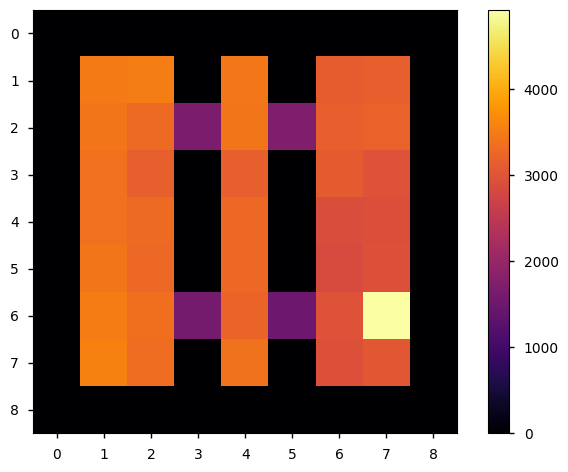

In [8]:
# TRAIN DATA COVERAGE
coverage_map = np.zeros(shape=(env.env.unwrapped.width, env.env.unwrapped.height))
for layout in train_layout_data:
    for obs in layout['observations']:
        obs = obs.astype(np.int16)
        coverage_map[obs[1], obs[0]] += 1
        
plt.imshow(coverage_map, cmap='inferno', vmin=0)
plt.colorbar()
plt.show()

In [18]:
import functools
from utils.datasets import Dataset, GCDataset

with initialize(version_base=None, config_path="../configs/"):
    iql_config = compose(config_name='entry.yaml', overrides=['experiment=gciql_dynamics.yaml']) # gciql gciql_dynamics
    iql_config = OmegaConf.to_container(iql_config, resolve=True)
    pprint(iql_config)
    
def concatenate_dicts(dict1, dict2):
    return jax.tree.map(lambda x, y: jnp.concatenate([x, y]), dict1, dict2)

whole_data = functools.reduce(concatenate_dicts, train_layout_data)
# np.save(f"../aux_data/iql_door_data_meta", arr=jax.device_get(whole_data))
# whole_data = np.load("/home/m_bobrin/ZeroShotRL/aux_data/iql_door_data_meta.npy", allow_pickle=True).item()
# whole_data = dataset_random
print(jax.tree.map(lambda x: x.shape, whole_data))
whole_dataset = Dataset.create(**jax.device_get(whole_data))
gc_whole_dataset = GCDataset(whole_dataset, config=iql_config['agent'])

# batch, batch_context, batch_context2 = gc_whole_dataset.sample(1, layout_type=1, context_length=20)

{
│   'seed': 42,
│   'run_group': 'gciql',
│   'save_dir': 'experiment_logs/',
│   'train_steps': 1000000,
│   'log_interval': 5000,
│   'eval_interval': 5000,
│   'eval_tasks': None,
│   'eval_episodes': 1,
│   'eval_temperature': 0,
│   'eval_gaussian': None,
│   'video_episodes': 1,
│   'video_frame_skip': 3,
│   'eval_on_cpu': 0,
│   'frame_stack': None,
│   'p_aug': None,
│   'agent': {
│   │   'agent_name': 'gciql',
│   │   'discrete': True,
│   │   'dataset_class': 'GCDataset',
│   │   'value_p_curgoal': 0.2,
│   │   'value_p_trajgoal': 0.8,
│   │   'value_p_randomgoal': 0.0,
│   │   'value_geom_sample': True,
│   │   'actor_p_curgoal': 0.0,
│   │   'actor_p_trajgoal': 1.0,
│   │   'actor_p_randomgoal': 0.0,
│   │   'actor_geom_sample': False,
│   │   'gc_negative': True,
│   │   'p_aug': 0.0,
│   │   'frame_stack': None,
│   │   'lr': 0.0003,
│   │   'batch_size': 256,
│   │   'const_std': True,
│   │   'actor_hidden_dims': [512, 512, 512],
│   │   'value_hidden_dims': [512, 512, 512],
│   │   'layer_norm': True,
│   │   'actor_loss': 'awr',
│   │   'alpha': 0.003,
│   │   'use_film': False,
│   │   'use_context': True,
│   │   'warmup_steps': 50000,
│   │   'n_blocks': 2,
│   │   'n_heads': 2,
│   │   'emb_dim': 64,
│   │   'output_dim': 8,
│   │   'context_len': 128,
│   │   'number_of_meta_envs': 2,
│   │   'use_masked_attention': False,
│   │   'use_mean_embedding': True,
│   │   'cosine_schedule': False,
│   │   'discount': 0.99,
│   │   'tau': 0.01,
│   │   'expectile': 0.9
│   },
│   'env': {'env_name': 'doors_context', 'discrete': True},
│   'tags': ['dynamics_gciql', 'discrete']
}

{'actions': (121390,), 'layout_type': (121390, 2), 'next_observations': (121390, 2), 'observations': (121390, 2), 'terminals': (121390,), 'valid_transitions': (121390,)}


In [25]:
from agents.dynamics_aware_iql import GCIQLAgent

example_batch = gc_whole_dataset.sample(1)
iql_agent = GCIQLAgent.create(
    0,
    example_batch['observations'],
    np.full_like(example_batch['actions'], env.env.action_space.n - 1),
    config=iql_config['agent']
)
if iql_config['agent']['use_context']:
    batch, batch_context, batch_context2 = gc_whole_dataset.sample(1, layout_type=0, context_length=20)
    pprint(jax.tree.map(lambda x: x.shape, batch_context))
    
    dynamics_emb = iql_agent.network.select('dynamic_transformer')(batch_context['traj_states'],
                                                                batch_context['traj_actions'],
                                                                batch_context['traj_next_states'],
                                                                train=False)
    iql_agent.update(batch_context, batch_context, train_context_embedding=True)
else:
    batch = gc_whole_dataset.sample(1)
    pprint(jax.tree.map(lambda x: x.shape, batch))
    iql_agent.update(batch, train_context_embedding=False)

{
│   'actions': (1,),
│   'layout_type': (1, 2),
│   'next_observations': (1, 2),
│   'observations': (1, 2),
│   'random_states': (1, 1, 2),
│   'random_states_decode': (1, 1, 2),
│   'terminals': (1,),
│   'traj_actions': (1, 20, 1),
│   'traj_next_states': (1, 20, 2),
│   'traj_states': (1, 20, 2),
│   'valid_transitions': (1,)
}

{'actions': (127,), 'layout_type': (127, 2), 'next_observations': (127, 2), 'observations': (127, 2), 'terminals': (127,), 'valid_transitions': (127,)}
(8,)


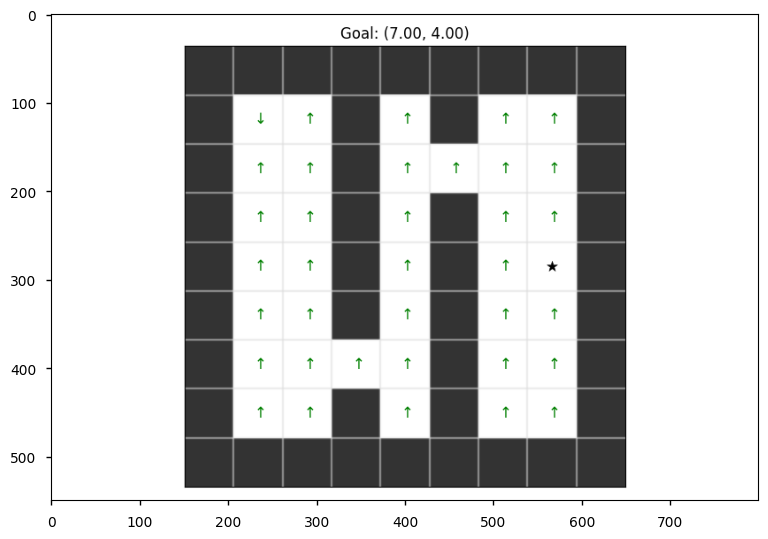

In [26]:
from functools import partial
from utils.evaluation import supply_rng
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

def get_canvas_image(canvas):
    canvas.draw() 
    out_image = np.asarray(canvas.buffer_rgba())
    return out_image

def policy_image_grid(env, dataset, action_fn=None, **kwargs):
    fig = plt.figure(tight_layout=True)
    canvas = FigureCanvas(fig)
    plot_policy(env, dataset, fig=fig, ax=plt.gca(), action_fn=action_fn, **kwargs)
    image = get_canvas_image(canvas)
    plt.close(fig)
    return image

def plot_policy(env, dataset, fig=None, ax=None, title=None, action_fn=None, **kwargs):
    action_names = [
            r'$\leftarrow$', r'$\rightarrow$', r'$\uparrow$', r'$\downarrow$'
        ]
    if fig is None or ax is None:
        fig, ax = plt.subplots()
    
    grid = env.get_grid_array()
    ax = env.plot_grid(ax=ax, grid=grid)
    
    goal = kwargs.get('goal', None)
    for (y, x), value in np.ndenumerate(grid):
        if value == 1 or value == 4:
            action = action_fn(np.concatenate([[x], [y]], -1)).squeeze()
            action_name = action_names[action]
            ax.text(x, y, action_name, ha='center', va='center', fontsize='large', color='green')
            
    ax.set_title('Goal: ({:.2f}, {:.2f})'.format(goal[0], goal[1])) 
    ax.scatter(goal[0], goal[1], s=80, c='black', marker='*')
        
    if title:
        ax.set_title(title)
        
    return fig, ax

def visualize_policy_image(layout_type):
    mdp_type = np.zeros((iql_config['agent']['number_of_meta_envs'], ))
    if layout_type == 0:
        mdp_type[0] = 1
    else:
        mdp_type[1] = 1
        
    env = DynamicsGeneralization_Doors(render_mode="rgb_array", highlight=False,
                                    max_steps=iql_config['agent']['context_len'] if iql_config['agent']['use_context'] else None)
    env._gen_grid = partial(env._gen_grid, layout_type=layout_type)
    env = MinigridWrapper(env)
    dynamics_embedding=None
    obs, info = env.reset()
    goal = info.get("goal_pos", None)
    if iql_config['agent']['use_context']:
        dataset_inference, env = random_exploration(env, num_episodes=1, layout_type=layout_type, num_mdp=NUM_TRAIN_LAYOUTS)
        print(jax.tree.map(lambda x: x.shape, dataset_inference))
        dynamics_embedding = iql_agent.network.select('dynamic_transformer')(dataset_inference['observations'][None], dataset_inference['actions'][None, :, None],
                                                                                    dataset_inference['next_observations'][None], train=False, return_embedding=True)
        dynamics_embedding = dynamics_embedding.squeeze()
        print(dynamics_embedding.shape)
        mdp_type=None
        
    example_batch = whole_dataset.sample(1)
    pred_policy_img = policy_image_grid(env, example_batch,
                                                    action_fn=partial(supply_rng(iql_agent.sample_actions, rng=jax.random.PRNGKey(np.random.randint(0, 2**32))),
                                                                    goals=goal, mdp_type=mdp_type, dynamics_embedding=dynamics_embedding, temperature=0.0),
                                                    goal=goal)
    return pred_policy_img

pred_policy_img = visualize_policy_image(layout_type=0)
plt.imshow(pred_policy_img)
plt.tight_layout()

{'actions': (127,), 'layout_type': (127, 2), 'next_observations': (127, 2), 'observations': (127, 2), 'terminals': (127,), 'valid_transitions': (127,)}


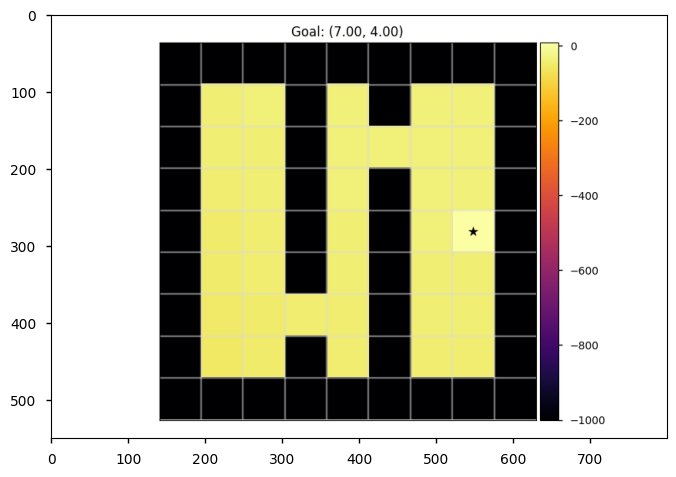

In [28]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

def value_image_fourrooms(env, dataset, value_fn, action_fn=None, **kwargs):
    fig = plt.figure(tight_layout=True)
    canvas = FigureCanvas(fig)
    plot_value_image_grid(env, dataset, value_fn, fig=fig, ax=plt.gca(), action_fn=action_fn, **kwargs)
    image = get_canvas_image(canvas)
    plt.close(fig)
    return image

def value_fn(agent, obs, goal, action, mdp_type=None, dynamics_embedding=None):
    q1, q2 = agent.network.select('critic')(obs, goal, action,mdp_num=mdp_type, dynamics_embedding=dynamics_embedding)
    q = jnp.minimum(q1, q2)
    return q / 0.02

def plot_value_image_grid(env, dataset, value_fn, action_fn, fig=None, ax=None, title=None, **kwargs):
    if fig is None or ax is None:
        fig, ax = plt.subplots()
    
    goal = kwargs.get('goal', None)
    grid = env.get_grid_array()
    ax = env.plot_grid(ax=ax, grid=grid)
    # print(grid)
    for (y, x), value in np.ndenumerate(grid):
        if value == 1 or value == 4:
            action = action_fn(np.concatenate([[x], [y]], -1)).squeeze()
            grid[y, x] = jax.device_get(value_fn(np.concatenate([[x], [y]], -1), goal, action))
            
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    im = ax.imshow(grid, cmap='inferno', vmin=-1000)
    fig.colorbar(im, cax=cax, orientation='vertical')
    if goal is not None:
        ax.set_title('Goal: ({:.2f}, {:.2f})'.format(goal[0], goal[1])) 
        ax.scatter(goal[0], goal[1], s=80, c='black', marker='*')
    return fig, ax

def visualize_value_image(layout_type):
    mdp_type = np.zeros((iql_config['agent']['number_of_meta_envs'], ))
    if layout_type == 0:
        mdp_type[0] = 1
    else:
        mdp_type[1] = 1
        
    env = DynamicsGeneralization_Doors(render_mode="rgb_array", highlight=False,
                                    max_steps=iql_config['agent']['context_len'] if iql_config['agent']['use_context'] else None)
    env._gen_grid = partial(env._gen_grid, layout_type=layout_type)
    env = MinigridWrapper(env)
    dynamics_embedding=None
    obs, info = env.reset()
    goal = info.get("goal_pos", None)
    if iql_config['agent']['use_context']:
        dataset_inference, env = random_exploration(env, num_episodes=1, layout_type=layout_type, num_mdp=NUM_TRAIN_LAYOUTS)
        print(jax.tree.map(lambda x: x.shape, dataset_inference))
        dynamics_embedding = iql_agent.network.select('dynamic_transformer')(dataset_inference['observations'][None], dataset_inference['actions'][None, :, None],
                                                                                    dataset_inference['next_observations'][None], dataset_inference['valid_transitions'][None, :, None],
                                                                                    train=False, return_embedding=True)
        dynamics_embedding = dynamics_embedding.squeeze()
        mdp_type=None
        
    pred_value_img = value_image_fourrooms(env, example_batch,
                                value_fn=partial(value_fn, iql_agent, mdp_type=mdp_type, dynamics_embedding=dynamics_embedding), action_fn=partial(supply_rng(iql_agent.sample_actions, rng=jax.random.PRNGKey(np.random.randint(0, 2**32))),
                                                                    goals=goal, mdp_type=mdp_type, temperature=0.0, dynamics_embedding=dynamics_embedding), goal=goal)
    return pred_value_img

pred_value_img = visualize_value_image(0)
plt.imshow(pred_value_img)


{'actions': (127,), 'layout_type': (127, 2), 'next_observations': (127, 2), 'observations': (127, 2), 'terminals': (127,), 'valid_transitions': (127,)}
(8,)
{'actions': (127,), 'layout_type': (127, 2), 'next_observations': (127, 2), 'observations': (127, 2), 'terminals': (127,), 'valid_transitions': (127,)}
{'actions': (127,), 'layout_type': (127, 2), 'next_observations': (127, 2), 'observations': (127, 2), 'terminals': (127,), 'valid_transitions': (127,)}
(8,)
{'actions': (127,), 'layout_type': (127, 2), 'next_observations': (127, 2), 'observations': (127, 2), 'terminals': (127,), 'valid_transitions': (127,)}


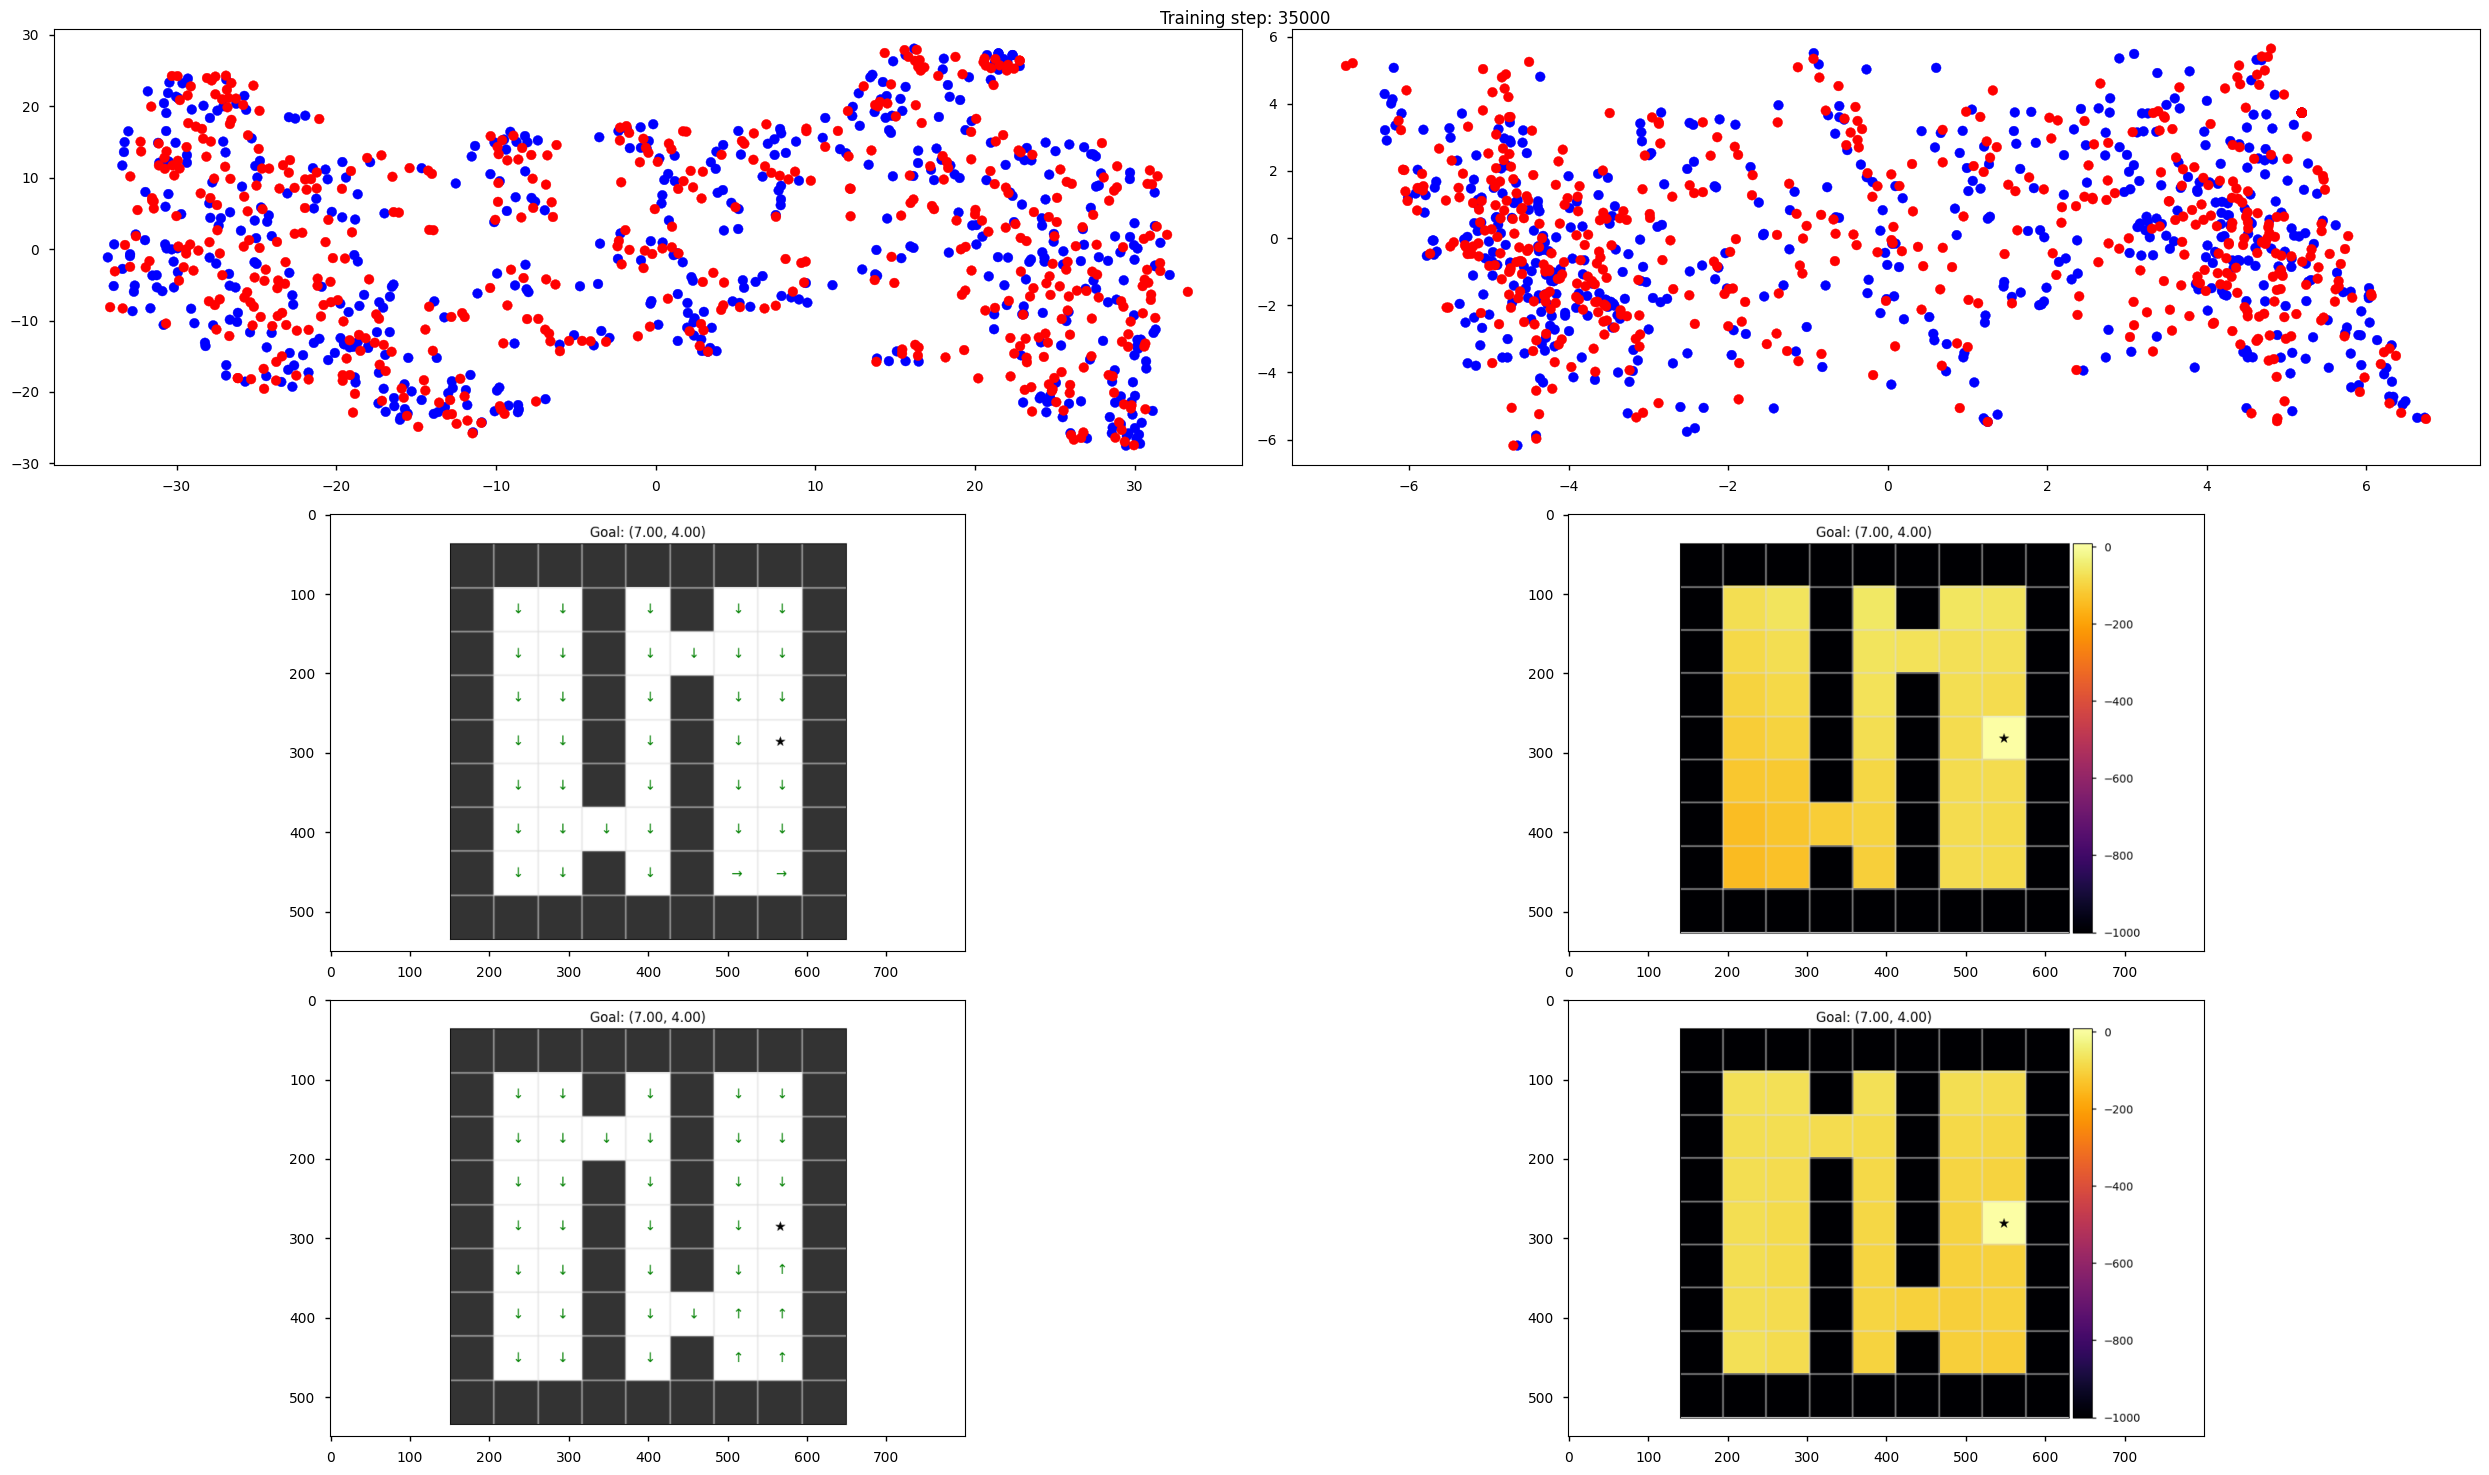

KeyboardInterrupt: 

In [29]:
from IPython.display import clear_output
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from matplotlib.colors import LinearSegmentedColormap

pbar = tqdm(range(200_000))
layout_embs = []

cmap = LinearSegmentedColormap.from_list('recent_to_old', ['cyan', 'black'])
obs, info = env.reset()
goal = info.get("goal_pos")

# with jax.disable_jit():
if iql_config['agent']['use_context']:
    _, batch_context_test0, _ =  gc_whole_dataset.sample(512, layout_type=0, context_length=iql_config['agent']['context_len'])
    _, batch_context_test1, _ = gc_whole_dataset.sample(512, layout_type=1, context_length=iql_config['agent']['context_len'])

    colors = ['blue'] * batch_context_test0['observations'].shape[0] + ['red'] * batch_context_test1['observations'].shape[0]
    test_embedding = jax.tree.map(lambda x, y: jnp.concatenate([x, y]), batch_context_test0, batch_context_test1)

for update_steps in pbar:
    if not iql_config['agent']['use_context']:
        batch = gc_whole_dataset.sample(iql_config['agent']['batch_size'])
        iql_agent, update_info = iql_agent.update(batch, train_context_embedding=False)
    else:
        batch, batch_context, _ = gc_whole_dataset.sample(iql_config['agent']['batch_size'], layout_type=update_steps % NUM_TRAIN_LAYOUTS,
                                                            context_length=iql_config['agent']['context_len'])
        _, negative_context, _ = gc_whole_dataset.sample(iql_config['agent']['batch_size'], layout_type=(update_steps + 1) % NUM_TRAIN_LAYOUTS,
                                                            context_length=iql_config['agent']['context_len'])
        iql_agent, update_info = iql_agent.update(batch, batch_context, train_context_embedding=True, negative_context=negative_context)
        
    if update_steps % 5_000 == 0:
        
        clear_output()
        if iql_config['agent']['use_context']:
            fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(25, 15))
            dynamics_embedding = iql_agent.network.select('dynamic_transformer')(test_embedding['traj_states'], test_embedding['traj_actions'],
                                                                                    test_embedding['traj_next_states'], 
                                                                                    train=False, return_embedding=True)
            tsne = TSNE(random_state=42, perplexity=30).fit_transform(dynamics_embedding)
            x, y = tsne[:, 0], tsne[:, 1]
            axs[0, 0].scatter(x, y, color=colors)
            
            pca = PCA().fit_transform(dynamics_embedding)
            x, y = pca[:, 0], pca[:, 1]
            axs[0, 1].scatter(x, y, color=colors)

            pred_policy_img = visualize_policy_image(layout_type=0)
            axs[1,0].imshow(pred_policy_img)
            pred_value_img = visualize_value_image(layout_type=0)
            axs[1, 1].imshow(pred_value_img)
            
            pred_policy_img = visualize_policy_image(layout_type=1)
            axs[2,0].imshow(pred_policy_img)
            pred_value_img = visualize_value_image(layout_type=1)
            axs[2, 1].imshow(pred_value_img)
        else:
            fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))
            pred_policy_img = visualize_policy_image(layout_type=0)
            axs[0, 0].imshow(pred_policy_img)
            pred_value_img = visualize_value_image(layout_type=0)
            axs[0, 1].imshow(pred_value_img)

            pred_policy_img = visualize_policy_image(layout_type=1)
            axs[1, 0].imshow(pred_policy_img)
            pred_value_img = visualize_value_image(layout_type=1)
            axs[1, 1].imshow(pred_value_img)
            
            # pred_policy_img = visualize_policy_image(layout_type=2)
            # axs[2, 0].imshow(pred_policy_img)
            # pred_value_img = visualize_value_image(layout_type=2)
            # axs[2, 1].imshow(pred_value_img)
            
        fig.suptitle(f"Training step: {update_steps}")   
        plt.tight_layout()
        display(fig)
        plt.close(fig)

In [22]:
dynamics_embedding = iql_agent.network.select('dynamic_transformer')(batch_context_test1['traj_states'], batch_context_test1['traj_actions'],
                                                                                    batch_context_test1['traj_next_states'], train=False)
dynamics_embedding = jnp.tile(dynamics_embedding[:, None], reps=(1, batch_context_test1['traj_states'].shape[1], 1))
next_state_pred = iql_agent.network.select('next_state_pred')(batch_context_test1['traj_states'], batch_context_test1['traj_actions'], dynamics_embedding)


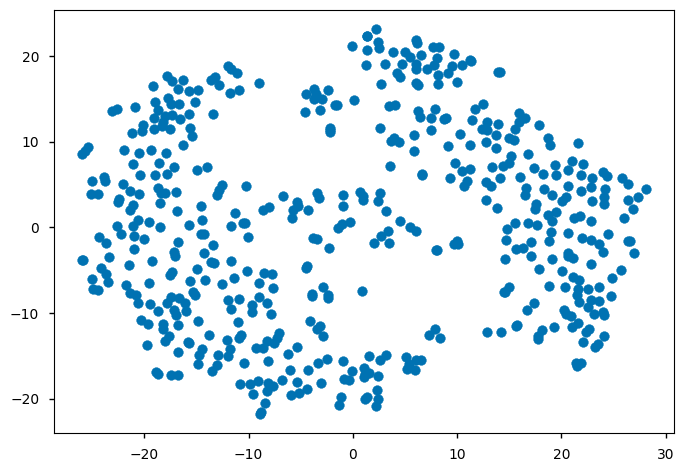

In [27]:
tsne = TSNE(random_state=42, perplexity=30).fit_transform(dynamics_embedding[:, 0, :])
x, y = tsne[:, 0], tsne[:, 1]
plt.scatter(x, y)